In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import bs4
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
# from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image


# Quora Question pair similarity

## Problem Statement
 
    . Identify which question similarity  
    . Our task is to find if question asked is dublicate or not.
    . Hence can help business to make good quality of user experience.
    
    
## Constrain

    . Prediction can take time- No time latency 
    . Error must be less i.e could ruin user experience.
    
    
## Mapping Problem 

    . It is 2 way classification i.e we have to predict either question is simiar or not.
    . Confusion Matrix is binary.
    . Since it is binary classification problem, log loss can be best form of error classification.
    
    

In [2]:
# reading the csv file

df = pd.read_csv("train.csv")
print("Number of data points :", df.shape)
# There are 6 column in the data

Number of data points : (404290, 6)


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## FOR question1

Since question1 is the text data, possible way to featurize the data is by using 

    [1] Bags of words.
    [2] Tfidf.
    [3] Word2Vec.
    [4] Responce Coding.
and average word2vec, average tfidf etc..

In [49]:
#unique question in quest1
# since question have id 
unique_ques1 = df.qid1.value_counts()
print("Total unique question in question1 is : ",len(unique_ques1))
print("The freq of question that occurs most frequently are : ")
print(unique_ques1.head())
print("\n")
print("Question that occured most frequently is : ")
print("*"*50)
for idx in unique_ques1.head().index:
    ques = df[df.qid1==idx]["question1"].iloc[0]
    print(ques)
    


Total unique question in question1 is :  290654
The freq of question that occurs most frequently are : 
8461     50
14110    48
1749     47
20628    47
25984    47
Name: qid1, dtype: int64


Question that occured most frequently is : 
**************************************************
How do I improve my English speaking?
How does the ban on 500 and 1000 rupee notes helps to identify black money and corruption?
How can changing 500 and 1000 rupee notes end the black money in India?
What should I do to earn money online?
How do I improve my English language?


In [50]:
# Check for NULL Values.
print("There are total of {} NUll values in question One ".format(df[df.question1.isnull()].shape[0]))

'''
checking if any question with question1 nan id matches so that we can replace the nan value.
'''
print("Number of Question that matches id with nan value question in question1 is ",df[df.qid1==493340].shape[0]-1)
print("The NUll Valued  question1 is : ")

df[df.question1.isnull()]

There are total of 1 NUll values in question One 
Number of Question that matches id with nan value question in question1 is  0
The NUll Valued  question1 is : 


,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [51]:
# maximum  = -1
# minimum = 10000000
# for sent in df["question1"]:
#     minimum = min(minimum,len(sent.split(' ')))
#     maximum = max(maximum,len(sent.split(' ')))
# print("Minimum length of word in question1 = ",minimum)
# print("Maximum lenght of word in question1 = ",maximum)

## For Question2

In [52]:
#unique question in quest1
# since question have id 
unique_ques2 = df.qid2.value_counts()
print("Total unique question in question1 is : ",len(unique_ques1))
print("The freq of question that occurs most frequently are : ")
print(unique_ques2.head())
print("\n")
print("Question that occured most frequently is : ")
print("*"*50)
for idx in unique_ques2.head().index:
    ques = df[df.qid2==idx]["question1"].iloc[0]
    print(ques)
    


Total unique question in question1 is :  290654
The freq of question that occurs most frequently are : 
30782    120
2559     115
4044     100
2561      71
17978     66
Name: qid2, dtype: int64


Question that occured most frequently is : 
**************************************************
If I link my Instagram account to my Facebook account, will my friends from Facebook be able to see the photos I post even if my Instagram account is private?
Why do I not lose weight when I throw up?
What are some ways to lose 25 pounds in one month?
How can I make money online in India?
What are some things new employees should know going into their first day at Audiovox?


In [54]:
# maximum  = -1
# minimum = 10000000
# for sent in df["question2"]:
#     minimum = min(minimum,len(sent.split(' ')))
#     maximum = max(maximum,len(sent.split(' ')))
# print("Minimum length of word in question2 = ",minimum)
# print("Maximum lenght of word in question2 = ",maximum)


In [55]:
# Check for NULL Values.
print("There are total of {} NUll values in question One ".format(df[df.question2.isnull()].shape[0]))

'''
checking if any question with question1 nan id matches so that we can replace the nan value.
'''
print("Number of Question that matches id with nan value question in question1 is ",df[df.qid2==174364].shape[0]-2)
print("The NUll Valued  question1 is : ")

df[df.question2.isnull()]

There are total of 2 NUll values in question One 
Number of Question that matches id with nan value question in question1 is  0
The NUll Valued  question1 is : 


,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


### Observation
    . There are not much null value in field but question1 and question4 contains 1 and 2 null value respectively
    . There are not much dimension in the data.
    . The id,qid1,qid2 are not useful data as it provide not much to learn to our model
    
    
# Data Analysis

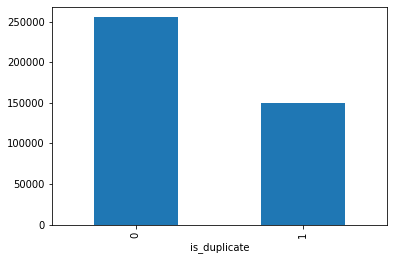

In [56]:
df.groupby("is_duplicate")["id"].count().plot.bar()
plt.show()

In [57]:
total_data = df.shape[0]
duplicate_number = df[df["is_duplicate"]==0]["is_duplicate"].count()
print("There are {} not  duplicate number where duplicate == 0 ".format((duplicate_number/total_data)*100))
print("There are {} duplicate number where duplicate == 1".format(100-(duplicate_number/total_data)*100))

There are 63.08021469737069 not  duplicate number where duplicate == 0 
There are 36.91978530262931 duplicate number where duplicate == 1


### Dublicate Data

In [58]:
# check if there are any dublicate as dublicate is no use
dublicated_data = df[["qid1","qid2","is_duplicate"]].groupby(["qid1","qid2"])
print("The number of dublicate question are",dublicated_data.count().shape[0]-df.shape[0])


The number of dublicate question are 0


### NULL Values

    checking for NULL Values

In [59]:
# removing the null values

print("Total number of NUll values are",df[df.isnull().any(1)].shape[0])
df[df.isnull().any(1)]

Total number of NUll values are 3


,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [60]:
# removing NUll values

df = df[~df.isnull().any(1)]
print("Total number of NULL values after clean up is ",df[df.isnull().any(1)].shape[0])

Total number of NULL values after clean up is  0


## Feature Engineering 

    . Some of the feature might be similarity between 2 sentences.
    . Common words between 2 sentences this ensure more the words common more is the simlarity.
    . frequency of word 1.
    . frequency of word 2.
    
Output of one model can be also taken in consideration for the feature.<br>
__for example__ :<br>
we train the data for some model and generate the output and the output can be added to the feature which is again trained to get final output.

In [61]:
# frequency of word 1
df["freq1"] = df.groupby("qid1")["qid1"].transform("count")
# frequncy of word 2
df["freq2"] = df.groupby("qid2")["qid2"].transform("count")


In [62]:
# Similary words in question1 and question2
def find_common_word(words):
    
    word1 = words[0].lower()
    word2 = words[1].lower()
    common = set()
    w1 = word1.split(" ")
    w2 = word2.split(" ")
    common.update(w1)
    common.update(w2)
    if len(common) == len(w1)+len(w2):
        return 0
    else:
        value = len(common) - (len(w1)+len(w2))
        return abs(value)/(len(w1)+len(w2))
    
df["common"] = df[["question1","question2"]].apply(find_common_word,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,0.500000
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,0.238095
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,0.050000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,0.100000


In [63]:
df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

In [64]:
df = pd.read_csv("df_fe_without_preprocessing_train.csv")
# df.drop(columns=["id"],axis=1,inplace=True)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,0.500000
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,0.238095
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,0.050000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,0.100000


## Distribution 
    
    . Using Vilon plot to find the distribution.
    . Using displot to understand distribution of data.
    

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


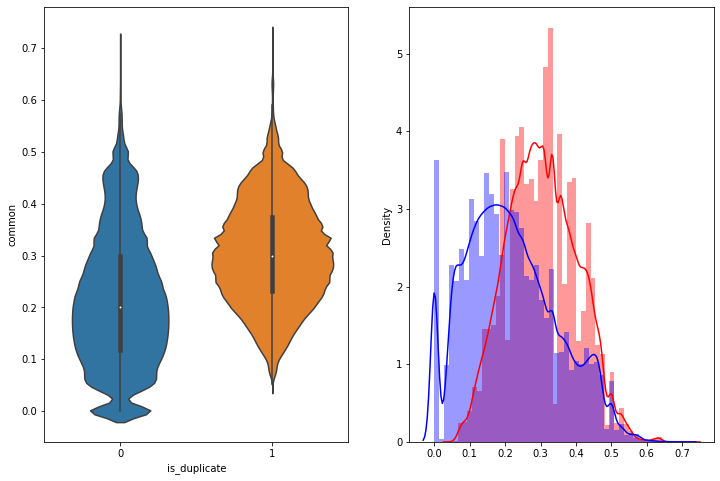

In [65]:
# plt.figure(figsize=(12,8))
# sns.violinplot(x="is_duplicate",y="common",data=df[0:])
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'common', data = df)

plt.subplot(1,2,2)
sns.distplot(x=df[df['is_duplicate'] == 1.0]['common'], label = "1", color = 'red')
sns.distplot(x=df[df['is_duplicate'] == 0.0]['common'], label = "0" , color = 'blue' )
plt.show()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='freq2', ylabel='Density'>

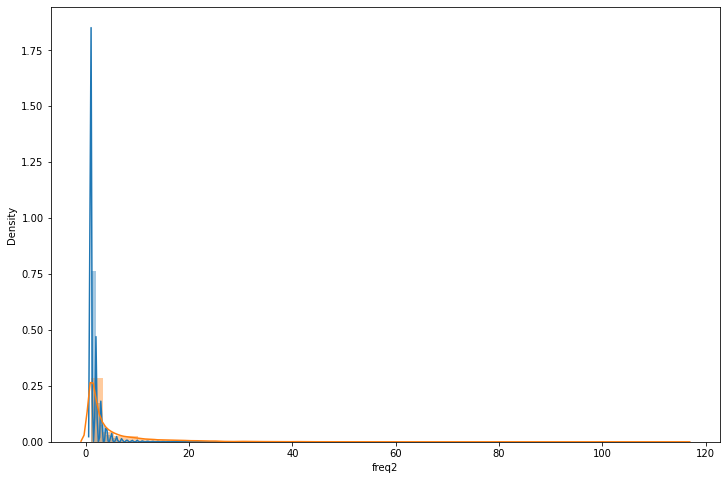

In [66]:
plt.figure(figsize=(12,8))

# plt.subplot(1,2,1)
sns.distplot(df[df["is_duplicate"]==0]["freq1"],label="1")
sns.distplot(df[df["is_duplicate"]==1]["freq2"],label="0")

# Observation

    . freq1 , freq2 donot help in seperation of the questions.
    . while word share can be used as the best feature.
    

# Text Preprocessing

    Removing the stop words.
    Lemitization.
    Uni-grams and bi-grams.
    Removing HTML tags.
    Removing special words.
    Removing Numbers.

In [67]:
df = pd.read_csv("df_fe_without_preprocessing_train.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,0.500000
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,0.238095
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,0.050000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,0.100000


In [68]:
stopword = stopwords.words("english")
stopword.remove("not")
stopword.remove("nor")
stopword.remove("no")

def preprocessing(x):
    # removing url if any 
    sent = re.sub(r"http\S+","",x)
    # removing html tags if any
    sent = BeautifulSoup(x,"lxml").text
    
    # changing cann't to can not and similar thing 
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
       .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
       .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
       .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
       .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
       .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
       .replace("€", " euro ").replace("'ll", " will")
    
    # Removing numbers from the sentences
    x = re.sub("\S*\d\S*", "", x).strip() 
    # removing special character from the sentences
    x = re.sub(r"[^a-zA-Z0-9]+"," ",x).strip()
    
    # stemming from the sentences
    x = x.split(" ")
    poster = PorterStemmer()
    sentences = set()
    for sent in x:
        if sent not in stopword :    
            sentences.add(poster.stem(sent))
        
    x = " ".join(sentences)
        
    return x
        
    
    
    
    

In [69]:
df["question1"] = df["question1"].apply(preprocessing)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: "." looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [70]:
from datetime import datetime
start_time = datetime.now()
df["question2"] = df["question2"].apply(preprocessing)
print("Time taken to process ",abs(start_time-datetime.now()))

Time taken to process  0:05:45.362233


In [71]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,common
0,0,1,2,guid share invest india market step,guid share invest market step,0,1,1,0.500000
1,1,3,4,koh diamond stori noor kohinoor,stole would happen back koh diamond govern ind...,0,4,1,0.238095
2,2,5,6,connect vpn speed increas internet use,speed increas internet hack dn,0,1,1,0.166667
3,3,7,8,lone mental solv,find divid remaind,0,1,1,0.050000
4,4,9,10,sugar quikli salt oxid dissolv methan carbon o...,would salt water fish surviv,0,3,1,0.100000


In [82]:
df.to_csv("after_preprocessing.csv",index=False)

In [4]:
# after preprocessing the text 

df = pd.read_csv("after_preprocessing.csv")

In [5]:
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,common
0,0,1,2,guid share invest india market step,guid share invest market step,0,1,1,0.500000
1,1,3,4,koh diamond stori noor kohinoor,stole would happen back koh diamond govern ind...,0,4,1,0.238095
2,2,5,6,connect vpn speed increas internet use,speed increas internet hack dn,0,1,1,0.166667
3,3,7,8,lone mental solv,find divid remaind,0,1,1,0.050000
4,4,9,10,sugar quikli salt oxid dissolv methan carbon o...,would salt water fish surviv,0,3,1,0.100000


In [7]:
df["question1"]   = df["question1"].apply(lambda x:str(x))
df["question2"]  = df["question2"].apply(lambda x:str(x))

type(df["question1"][0])

str

In [8]:
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,common


In [26]:
##### what is the most common word when dublicate and when not dublicate?
# when dublicate
not_duplicate_df = df[df.is_duplicate==0]
duplicate_df = df[df.is_duplicate==1]
not_duplicate_ques = list(not_duplicate_df.question1)+list(not_duplicate_df.question2)
duplicate_ques = list(duplicate_df.question1)+list(duplicate_df.question2)



# finding occurance

def common_word(dataset,word_dict):
    for i in dataset:
        for word in i.split():
            if word in word_dict:
                word_dict[word] +=1
            else:
                word_dict[word] = 1
        
word_dict_duplicate = {}      
common_word(duplicate_ques,word_dict_duplicate)
word_dict_notduplicate = {}
common_word(not_duplicate_ques,word_dict_notduplicate)

In [27]:
word_dicts_duplicate = sorted(word_dict_duplicate.items(),key=lambda x:x[1],reverse=True)
word_dicts_not_duplicate = sorted(word_dict_notduplicate.items(),key=lambda x:x[1],reverse=True)

In [28]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq1,freq2,common
0,0,1,2,guid share invest india market step,guid share invest market step,0,1,1,0.500000
1,1,3,4,koh diamond stori noor kohinoor,stole would happen back koh diamond govern ind...,0,4,1,0.238095
2,2,5,6,connect vpn speed increas internet use,speed increas internet hack dn,0,1,1,0.166667
3,3,7,8,lone mental solv,find divid remaind,0,1,1,0.050000
4,4,9,10,sugar quikli salt oxid dissolv methan carbon o...,would salt water fish surviv,0,3,1,0.100000


In [29]:
df.isnull().any()

id              False
qid1            False
qid2            False
question1       False
question2       False
is_duplicate    False
freq1           False
freq2           False
common          False
dtype: bool

In [30]:
print("The most common word when duplicate question are found are : ")
count = 1
for i in word_dicts_duplicate[:10]:  
    print(count,".",i[0],"with frequency: ",i[1])
    count +=1
    
print("\n")   
print("*"*50)
print("The most common word when not duplicate question are found are : ")
count = 1
for i in word_dicts_not_duplicate[:10]:  
    print(count,".",i[0],"with frequency: ",i[1])
    count +=1

The most common word when duplicate question are found are : 
1 . best with frequency:  34245
2 . get with frequency:  15906
3 . india with frequency:  12809
4 . way with frequency:  12307
5 . quora with frequency:  12102
6 . not with frequency:  10975
7 . peopl with frequency:  10578
8 . learn with frequency:  8894
9 . make with frequency:  8609
10 . money with frequency:  8331


**************************************************
The most common word when not duplicate question are found are : 
1 . best with frequency:  35849
2 . not with frequency:  29981
3 . get with frequency:  27188
4 . use with frequency:  20317
5 . like with frequency:  19927
6 . good with frequency:  17147
7 . differ with frequency:  17106
8 . india with frequency:  15895
9 . peopl with frequency:  15023
10 . would with frequency:  14881


## TRAIN TEST CV SPLIT (60-20-20)
Since during Training time, test and cv values must not be seen. So better split the data

Here, 

we split our data in ratio of :
    
    Train - 60%
    Test  -  20%
    CV    - 20%

In [9]:
y_data = df["is_duplicate"]
x_data = df.drop(columns=["is_duplicate"])
x_data.head()

,id,qid1,qid2,question1,question2,freq1,freq2,common
0,0,1,2,guid share invest india market step,guid share invest market step,1,1,0.500000
1,1,3,4,koh diamond stori noor kohinoor,stole would happen back koh diamond govern ind...,4,1,0.238095
2,2,5,6,connect vpn speed increas internet use,speed increas internet hack dn,1,1,0.166667
3,3,7,8,lone mental solv,find divid remaind,1,1,0.050000
4,4,9,10,sugar quikli salt oxid dissolv methan carbon o...,would salt water fish surviv,3,1,0.100000


In [10]:
# spliting data in train, test and cv
train_i,test_x,y_train,y_test = train_test_split(x_data,y_data,train_size=0.80)
train_df,cv_df,y_train,y_cv = train_test_split(train_i,y_train,train_size=0.80)

In [11]:
print("The size of Train, Test and Cv are : ")
print("Train : ",train_df.shape)
print("CV : ",cv_df.shape)
print("Test : ",test_x.shape)

The size of Train, Test and Cv are : 
Train :  (258743, 8)
CV :  (64686, 8)
Test :  (80858, 8)


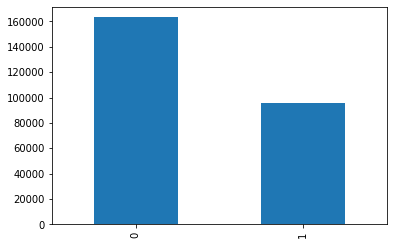

0    163188
1     95555
Name: is_duplicate, dtype: int64


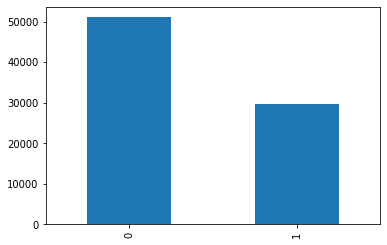

0    51070
1    29788
Name: is_duplicate, dtype: int64


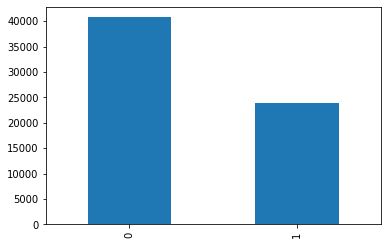

0    40766
1    23920
Name: is_duplicate, dtype: int64


In [12]:
# distribution of data in train,test and cv

# for train data
y_train.value_counts().plot.bar()
plt.show()
print(y_train.value_counts())

# for test data
y_test.value_counts().plot.bar()
plt.show()
print(y_test.value_counts())

y_cv.value_counts().plot.bar()
plt.show()
print(y_cv.value_counts())

# Text Featurizing 

    . using Bags of words
    . using tfidf
    

In [13]:
questions = list(train_df["question1"]) + list(train_df["question2"])

In [14]:
train_df[train_df["question1"].isnull()]

,id,qid1,qid2,question1,question2,freq1,freq2,common


In [15]:
len(questions)

517486

## Bags of Words 

In [16]:

bow = CountVectorizer(max_features=200)
bow_vector  = bow.fit(questions)


In [17]:
print("The feature name are ",bow.get_feature_names()[50:70])
print("The type of vector is ",type(bow_vector))


The feature name are  ['even', 'ever', 'exam', 'exampl', 'exist', 'experi', 'facebook', 'feel', 'find', 'first', 'follow', 'food', 'free', 'friend', 'game', 'get', 'girl', 'give', 'go', 'good']
The type of vector is  <class 'sklearn.feature_extraction.text.CountVectorizer'>


In [18]:
ids = [i for i in range(df.shape[0])]

In [19]:
from datetime import datetime
print("Started...")
start_time = datetime.now()
train_question1_bow = bow_vector.transform(train_df["question1"])
train_question2_bow = bow_vector.transform(train_df["question2"])
print("Done...")
print("Total time taken : ",datetime.now()-start_time)


Started...
Done...
Total time taken :  0:00:02.551372


In [20]:
# For test data
test_question1_bow = bow_vector.transform(test_x["question1"])
test_question2_bow = bow_vector.transform(test_x["question2"])
# for cv data
cv_question1_bow = bow_vector.transform(cv_df["question1"])
cv_question2_bow = bow_vector.transform(cv_df["question2"])
print("Done ... ")


Done ... 


## TFIDF Vectorization 


In [21]:
tfidf = TfidfVectorizer(max_features=200)
tfidf_vec = tfidf.fit(questions)
# for train data
train_question1_tfidf = tfidf_vec.transform(train_df["question1"])
train_question2_tfidf = tfidf_vec.transform(train_df["question2"])
print("The size of training tfidf vector are : ",(train_question1_tfidf.shape))
# For test data
test_question1_tfidf = tfidf_vec.transform(test_x["question1"])
test_question2_tfidf = tfidf_vec.transform(test_x["question2"])
print("The size of testing tfid vector are : ",(test_question1_tfidf.shape))
# for cv data
cv_question1_tfidf = tfidf_vec.transform(cv_df["question1"])
cv_question2_tfidf = tfidf_vec.transform(cv_df["question2"])
print("The size of cv tfidf vector are : ",(cv_question1_tfidf.shape))

The size of training tfidf vector are :  (258743, 200)
The size of testing tfid vector are :  (80858, 200)
The size of cv tfidf vector are :  (64686, 200)


## Stacking the BOW and TFIDF vectors.

In [22]:
print("Stacking the Vectors ....")
start_time = datetime.now()
tfidf_stack_train = np.hstack((train_question1_bow.toarray(),train_question2_bow.toarray()))
tfidf_stack_test = np.hstack((test_question1_bow.toarray(),test_question2_bow.toarray()))
tfidf_stack_cv = np.hstack((cv_question1_bow.toarray(),cv_question2_bow.toarray()))
print("Tfidf done....")
print("Started Bow ....")
bow_stack_train = np.hstack((train_question1_bow.toarray(),train_question2_bow.toarray()))
bow_stack_test = np.hstack((test_question1_bow.toarray(),test_question2_bow.toarray()))
bow_stack_cv = np.hstack((cv_question1_bow.toarray(),cv_question2_bow.toarray()))
print("Done ...")
print("Total time taken to finish : ",datetime.now()-start_time)

Stacking the Vectors ....
Tfidf done....
Started Bow ....
Done ...
Total time taken to finish :  0:00:01.415218


In [23]:
## Creating final datasets for train test and cv for word vectors.
train_x_bow = pd.DataFrame(bow_stack_train)
test_x_bow = pd.DataFrame(bow_stack_test)
cv_x_bow = pd.DataFrame(bow_stack_cv)

train_x_tfidf = pd.DataFrame(tfidf_stack_train)
test_x_tfidf = pd.DataFrame(tfidf_stack_test)
cv_x_tfidf = pd.DataFrame(tfidf_stack_cv)

In [ ]:
# bow
train_x_bow.to_csv("train_x_bow.csv")
test_x_bow.to_csv("test_x_bow.csv")
cv_x_bow.to_csv("cv_x_bow.csv")

#tfidf

train_x_tfidf.to_csv("train_x_tfidf.csv")
test_x_tfidf.to_csv("test_x_tfidf.csv")
cv_x_tfidf.to_csv("cv_x_tfidf.csv")



In [ ]:
## reading the file 
train_x_bow = pd.read_csv("train_x_bow.csv")
test_x_bow = pd.read_csv("test_x_bow.csv")
cv_x_bow = pd.read_csv("cv_x_bow.csv")

# for tfidf 

train_x_tfidf = pd.read_csv("train_x_tfidf.csv")
test_x_tfidf = pd.read_csv("test_x_tfidf.csv")
cv_x_tfidf = pd.read_csv("cv_x_tfidf.csv")

# dataframe
df = pd.read_csv("after_preprocessing.csv")

# Building the Model

    .Since ques is binary classification we can use accuacy or pecision as the preformance matrix.
    . Dataset is not imbalance.
    . Loss can be calculated using log loss.
    . For binary classification we can use
        . Logistic regression.
        . Linera svm. 
        . Tree.

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
import numpy as np
from datetime import datetime

In [124]:
#  loading the dataset.

print("Reading Files....")
start_time = datetime.now()
## reading the file 
train_x_bow = pd.read_csv("train_x_bow.csv",index_col=[0])
test_x_bow = pd.read_csv("test_x_bow.csv",index_col=[0])
cv_x_bow = pd.read_csv("cv_x_bow.csv",index_col=[0])

# for tfidf 

train_x_tfidf = pd.read_csv("train_x_tfidf.csv",index_col=[0])
test_x_tfidf = pd.read_csv("test_x_tfidf.csv",index_col=[0])
cv_x_tfidf = pd.read_csv("cv_x_tfidf.csv",index_col=[0])

print("Done...")
print("Total time taken to read : ",datetime.now()-start_time)

Reading Files....
Done...
Total time taken to read :  0:00:48.218542


In [25]:
# viewing the datasets
test_x_bow.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Distribution of data in train and test data are 
For train data number of 0 are  0.6306953231585009
For train data number of 1 are  0.3693046768414991
**************************************************
For test data number of 0 are  0.6316010784337975
For test data number of 1 are  0.36839892156620246
**************************************************
For cv data number of 0 are  0.6302136474662214
For cv data number of 1 are  0.36978635253377856


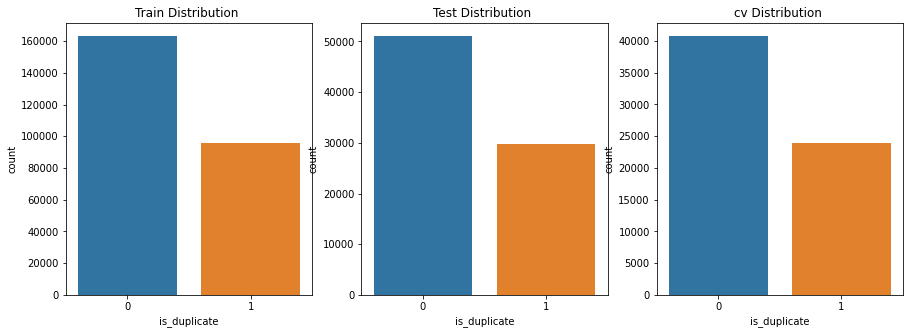

In [26]:
print("Distribution of data in train and test data are ")
print("For train data number of 0 are ",(len(y_train[y_train==0]))/len(y_train))
print("For train data number of 1 are ",(len(y_train[y_train==1]))/len(y_train))

print("*"* 50)

print("For test data number of 0 are ",(len(y_test[y_test==0]))/len(y_test))
print("For test data number of 1 are ",(len(y_test[y_test==1]))/len(y_test))

print("*"* 50)

print("For cv data number of 0 are ",(len(y_cv[y_cv==0]))/len(y_cv))
print("For cv data number of 1 are ",(len(y_cv[y_cv==1]))/len(y_cv))

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Train Distribution ")
sns.countplot(x=y_train)
plt.subplot(132)
plt.title("Test Distribution ")
sns.countplot(x=y_test)
plt.subplot(133)
plt.title("cv Distribution ")
sns.countplot(x=y_cv)
plt.show()

In [6]:
# draw the performance matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_train,y_pred):
    
    matrix = confusion_matrix(y_train,y_pred)
    
    
    # axis = 0  means column addition
    # axis = 1 means row addition
    
    # where numpy divides the  number in column basic
    
    # precision matrix 
        # precision is defined as out of all the prediction how my is classifed as the right 
        
    precision = (matrix.T/matrix.sum(axis=1)).T
    
    # recall matrix 
        # recall  is defined as out of all the true value how many are truely classified 
     
    recall = matrix/matrix.sum(axis=0)
    
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    plt.title("Confusion Matrix")
    sns.heatmap(matrix,annot=True,fmt=".3f",cmap="YlGnBu")
    plt.xlabel("predicted ")
    plt.ylabel("actual")
    
    
    """
    Precision matrix
    """
    plt.subplot(1,3,2)
    plt.title("Recall Matrix")
    sns.heatmap(precision,annot=True,fmt=".3f",cmap="YlGnBu")
    plt.xlabel("predicted ")
    plt.ylabel("actual")
    
    """
    Recall matrix
    """
    
    
    plt.subplot(1,3,3)
    plt.title("Precision Matrix")
    sns.heatmap(recall,annot=True,fmt=".3f",cmap="YlGnBu")
    plt.xlabel("predicted ")
    plt.ylabel("actual")
    
    plt.show()
    
    
    
    

### Random Model

The testing loss for Random Model:  0.8876563673424414


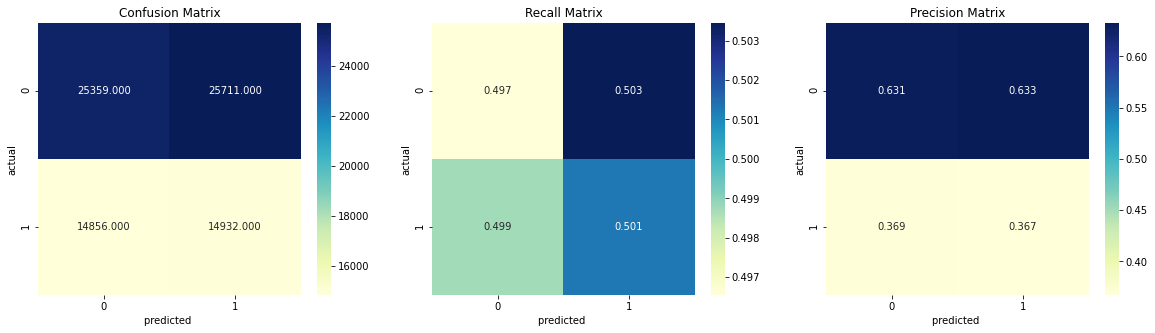

In [28]:
# lets build a random model which randomly picks the values.
# it become threshold for our model 

y_rand = np.zeros((y_test.shape[0],2))
for i in range(y_rand.shape[0]):
    rand_int = np.random.rand(1,2)
    y_rand[i] = rand_int[0]/sum(rand_int[0])
    
# evaluating the loss of random model
print("The testing loss for Random Model: ",log_loss(y_test,y_rand))
pred_rand = np.argmax(y_rand,axis=1)
plot_confusion_matrix(y_test,pred_rand)

#### How does our feature perform to give correct output?

- __Text Feature : BOW__


In [7]:
from datetime import datetime
from tqdm import tqdm

alpha = [10**i for i in range(-5,0)]

# since model we using is logistic Regression 
# so using calibrated output ie sigmoid function.
# for better probolistic result.
def model(alpha,x_train,y_train,x_cv,y_cv,x_test,y_test): 
    loss = []
    print("Started ....")
    start_time = datetime.now()
    for i in tqdm(alpha):
        clf = SGDClassifier(alpha=i,loss="log")
        clf.fit(x_train,y_train)
        # for the log loss we use calibrated model to get the actural probability 
        sig_cal = CalibratedClassifierCV(clf,method="sigmoid")
        
        sig_cal.fit(x_train,y_train)
        predicted_y = sig_cal.predict_proba(x_cv)
        loss_val = log_loss(y_cv,predicted_y)
        loss.append(loss_val)
        print("The log loss for the {} value of alpha is {}".format(i,loss_val))
     
    print("\n")
    print("*"*50)
    print("\n")
    best_score = np.argmin(loss)
    best_alpha = alpha[best_score]

    print("Traning in the best alpha :")
    
    clf = SGDClassifier(alpha=best_alpha,loss="log")
    clf.fit(x_train,y_train)
    sig_cal = CalibratedClassifierCV(clf,method="sigmoid")
    sig_cal.fit(x_train,y_train)
    predicted_y_train = sig_cal.predict_proba(x_train)
    loss_val_train = log_loss(y_train,predicted_y_train)
    print("For {} value of alpha train Loss is : {}".format(best_alpha,loss_val_train))

    predicted_y_test = sig_cal.predict_proba(x_test)
    loss_val_test = log_loss(y_test,predicted_y_test)
    print("For {} value of alpha test Loss is : {}".format(best_alpha,loss_val_test))

    predicted_y_cv = sig_cal.predict_proba(x_cv)
    loss_val_cv = log_loss(y_cv,predicted_y_cv)
    print("For {} value of alpha cv Loss is : {}".format(best_alpha,loss_val_cv))
    
    #### plot the confusion matrix
    print("Confusion matrix for test : ")
    pred_test = sig_cal.predict(x_test)
    plot_confusion_matrix(y_test,pred_test)
    
    print("Done...")
    print("Total time taken : ",datetime.now()-start_time)


Started ....
The log loss for the 1e-05 value of alpha is 0.6065702983150493
The log loss for the 0.0001 value of alpha is 0.6058214505662012
The log loss for the 0.001 value of alpha is 0.6068273803636665
The log loss for the 0.01 value of alpha is 0.6154052235531368
The log loss for the 0.1 value of alpha is 0.6269166049897925
The log loss for the 1 value of alpha is 0.6295135062482099
The log loss for the 10 value of alpha is 0.6291320473324139
The log loss for the 100 value of alpha is 0.636708301137953
The log loss for the 1000 value of alpha is 0.639509244214597
The log loss for the 10000 value of alpha is 0.6446205548021255


**************************************************


Traning in the best alpha :
For 0.0001 value of alpha train Loss is : 0.6414887444926382
For 0.0001 value of alpha test Loss is : 0.6408673549343401
For 0.0001 value of alpha cv Loss is : 0.6447318331846511
Confusion matrix for test : 


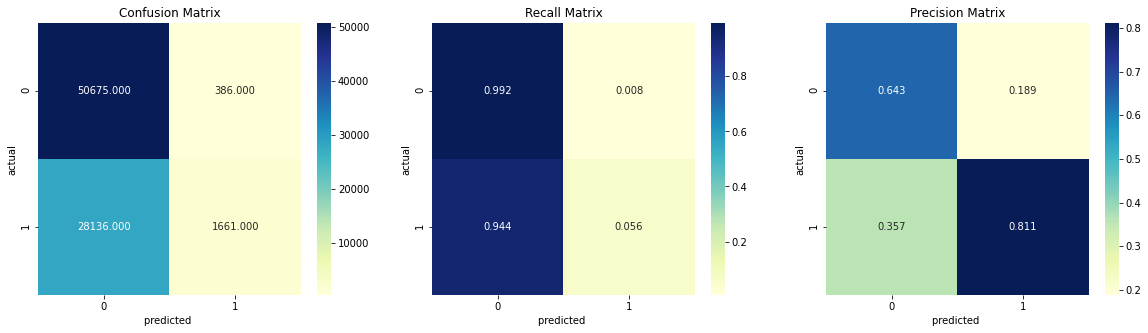

Done...
Total time taken :  0:09:17.032728


In [133]:
model(alpha,train_x_bow,y_train,cv_x_bow,y_cv,test_x_bow,y_test)

Started ....
The log loss for the 0.0001 value of alpha is 0.6057900577629636


**************************************************


Traning in the best alpha :
For 0.0001 value of alpha train Loss is : 0.601240701957354
For 0.0001 value of alpha test Loss is : 0.5996976220731198
For 0.0001 value of alpha cv Loss is : 0.605848024347283
Confusion matrix for test : 


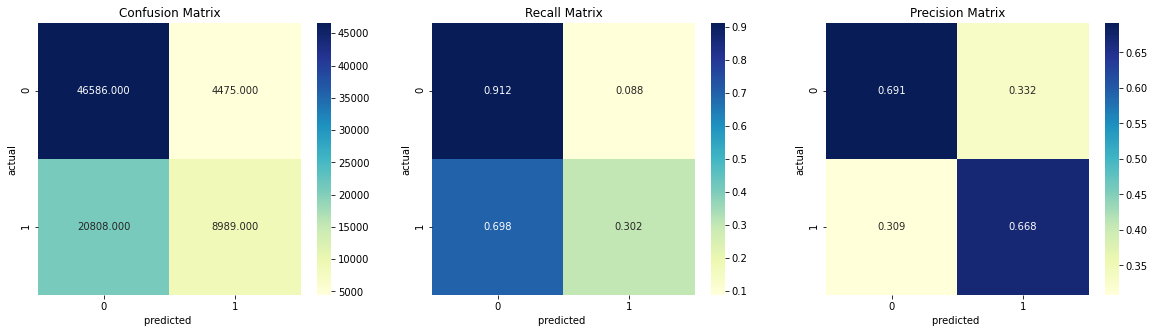

Done...
Total time taken :  0:01:49.574252


In [137]:
alpha=[best_alpha]
model(alpha,train_x_bow,y_train,cv_x_bow,y_cv,test_x_bow,y_test)

### Using TFIDF Features ...

Started ....


 20%|████████████████▊                                                                   | 1/5 [00:29<01:57, 29.37s/it]

The log loss for the 1e-05 value of alpha is 0.6060539777742793


 40%|█████████████████████████████████▌                                                  | 2/5 [00:46<01:07, 22.45s/it]

The log loss for the 0.0001 value of alpha is 0.6052615714043431


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:01<00:37, 18.95s/it]

The log loss for the 0.001 value of alpha is 0.6062737747437658


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [01:15<00:16, 16.89s/it]

The log loss for the 0.01 value of alpha is 0.6144639148540039


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:29<00:00, 17.80s/it]

The log loss for the 0.1 value of alpha is 0.625597304275181


**************************************************


Traning in the best alpha :


For 0.0001 value of alpha train Loss is : 0.6006730135209997
For 0.0001 value of alpha test Loss is : 0.6017437728925792
For 0.0001 value of alpha cv Loss is : 0.6053816261233625
Confusion matrix for test : 


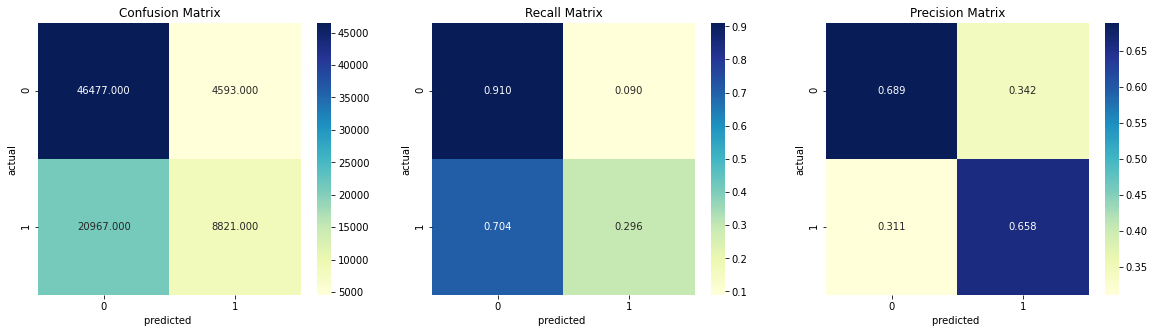

Done...
Total time taken :  0:01:50.525857


In [31]:
model(alpha,train_x_tfidf,y_train,cv_x_tfidf,y_cv,test_x_tfidf,y_test)

In [35]:
drop_col = ["id","qid1","question1","question2","qid2"]
train_df.drop(columns=drop_col,inplace=True)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
train_df.drop(columns=['qid2'],inplace=True)
train_df.head()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,freq1,freq2,common
14912,2,1,0.307692
399019,1,1,0.133333
303111,1,2,0.357143
7392,1,1,0.125000
274699,1,5,0.200000


In [40]:
## Stacking the final dataframe 
# ids = [i for i in range(train_df.shape[0])]
# train_df["ids"] = ids

C:\Users\dell\AppData\Local\Temp/ipykernel_19644/1194174924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["ids"] = ids


In [52]:
test_x.drop(columns=drop_col,inplace=True)
test_x.head()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,qid2,freq1,freq2,common
47421,57176,4,2,0.357143
245542,358401,1,1,0.272727
73001,125330,1,1,0.166667
280699,128200,5,4,0.363636
42504,76581,1,1,0.307692


In [53]:
test_x.drop(columns=["qid2"],inplace=True)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
test_x.head()

,freq1,freq2,common
47421,4,2,0.357143
245542,1,1,0.272727
73001,1,1,0.166667
280699,5,4,0.363636
42504,1,1,0.307692


In [56]:
cv_df.head()
cv_df.drop(columns=drop_col,inplace=True)
cv_df.drop(columns=['qid2'],inplace=True)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
cv_df.head()

NameError: name 'cv_df' is not defined

### Stacking 

- __ONE-HOT-ENCODING__ : BOW
- __TFIDF__ :

In [74]:
print("Stacking the data ....")
start_time = datetime.now()
# for bow
train_df = np.array(train_df)
test_df = np.array(test_x)
cv_df = np.array(cv_df)

train_x_onehotencoding = np.hstack((train_df,train_x_bow))
test_x_onehotencoding = np.hstack((test_df,test_x_bow))
cv_x_onehotencoding = np.hstack((cv_df,cv_x_bow))

# for tfidf
train_x_tfidf = np.hstack((train_df,train_x_tfidf))
test_x_tfidf = np.hstack((test_df,test_x_tfidf))
cv_x_tfidf = np.hstack((cv_df,cv_x_tfidf))

# preparing final csv file 

# for bow
train_x_onehotencoding = pd.DataFrame(train_x_onehotencoding)
test_x_onehotencoding = pd.DataFrame(test_x_onehotencoding)
cv_x_onehotencoding = pd.DataFrame(cv_x_onehotencoding)

# FOr labels
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_cv = pd.DataFrame(y_cv)

# for tfidf
train_x_tfidf = pd.DataFrame(train_x_tfidf)
test_x_tfidf = pd.DataFrame(test_x_tfidf)
cv_x_tfidf = pd.DataFrame(cv_x_tfidf)

print("DOne....")
print("Total time taken : ",datetime.now()-start_time)

Stacking the data ....
DOne....
Total time taken :  0:00:28.277915


In [75]:
print("Saving the Processed File ...")
start_time = datetime.now()

# for bow
train_x_onehotencoding.to_csv("train_x_onehotencoding.csv")
test_x_onehotencoding.to_csv("test_x_onehotencoding.csv")
cv_x_onehotencoding.to_csv("cv_x_onehotencoding.csv")

# FOr labels
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")
y_cv.to_csv("y_cv.csv")

# for tfidf
train_x_tfidf.to_csv("train_x_tfidf.csv")
test_x_tfidf.to_csv("test_x_tfidf.csv")
cv_x_tfidf.to_csv("cv_x_tfidf.csv")

print("Done..")
print("Total time taken : ",datetime.now()-start_time)

Saving the Processed File ...
Done..
Total time taken :  0:05:01.506598


In [40]:
## Reading the final files
print("Reading .... ")
start_time = datetime.now()
# for bow
print("Reading Bow : ")
train_x_onehotencoding = pd.read_csv("train_x_onehotencoding.csv",index_col=[0])
test_x_onehotencoding= pd.read_csv("test_x_onehotencoding.csv",index_col=[0])
cv_x_onehotencoding= pd.read_csv("cv_x_onehotencoding.csv",index_col=[0])

print("Done.... ")
print("Reading Label ...")
# FOr labels
y_train = pd.read_csv("y_train.csv",index_col=[0])
y_test = pd.read_csv("y_test.csv",index_col=[0])
y_cv = pd.read_csv("y_cv.csv",index_col=[0])
print("Done ....")
# for tfidf
print("Reading Tfidf ....")
train_x_tfidf = pd.read_csv("train_x_tfidf.csv",index_col=[0])
test_x_tfidf = pd.read_csv("test_x_tfidf.csv",index_col=[0])
cv_x_tfidf = pd.read_csv("cv_x_tfidf.csv",index_col=[0])
print("Done...")
print("Total time taken : ",datetime.now()-start_time)

Reading .... 
Reading Bow : 
Done.... 
Reading Label ...
Done ....
Reading Tfidf ....
Done...
Total time taken :  0:01:04.254803


In [41]:
print("Size of training : ",train_x_onehotencoding.shape)
print("Size of testing : ",test_x_onehotencoding.shape)
print("Size of cv : ",cv_x_onehotencoding.shape)

Size of training :  (258743, 403)
Size of testing :  (80858, 403)
Size of cv :  (64686, 403)


In [42]:
# forming the numpy array 
train_x_tfidf = np.array(train_x_tfidf)
test_x_tfidf = np.array(test_x_tfidf)
cv_x_tfidf = np.array(cv_x_tfidf)

y_cv = np.array(y_cv).ravel()
y_test = np.array(y_test).ravel()
y_train = np.array(y_train).ravel()

cv_x_onehotencoding = np.array(cv_x_onehotencoding)
test_x_onehotencoding = np.array(test_x_onehotencoding)
train_x_onehotencoding  = np.array(train_x_onehotencoding)

### Building model 
- __Logistic Regression__
- __alpha for hyper parameter__



##### ONE HOT ENCODING 

In [33]:
# train_x_onehotencoding = train_x_onehotencoding[:10000]
# test_x_onehotencoding = test_x_onehotencoding[:10000]
# cv_x_onehotencoding = cv_x_onehotencoding[:10000]

# y_train = y_train[:10000]
# y_test = y_test[:10000]
# y_cv = y_cv[:10000]


In [36]:
test_x_onehotencoding.shape

(10000, 403)

For values of alpha =  1e-05 The log loss is: 0.5062070784231154
For values of alpha =  0.0001 The log loss is: 0.4939950557655662
For values of alpha =  0.001 The log loss is: 0.4950237877946008
For values of alpha =  0.01 The log loss is: 0.5385763904582748
For values of alpha =  0.1 The log loss is: 0.5726304328669087
For values of alpha =  1 The log loss is: 0.5819160295016856


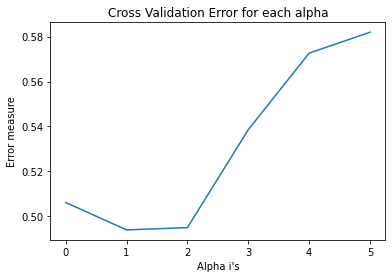

For values of best alpha =  0.0001 The train log loss is: 0.48688982919627605
For values of best alpha =  0.0001 The cross validation log loss is: 0.4939950557655662
For values of best alpha =  0.0001 The test log loss is: 0.48950220875239403


In [43]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotencoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding, y_train)
    predict_y = sig_clf.predict_proba(cv_x_onehotencoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


plt.title("Cross Validation Error for each alpha")
plt.plot(cv_log_error_array)
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding, y_train)

predict_y = sig_clf.predict_proba(train_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

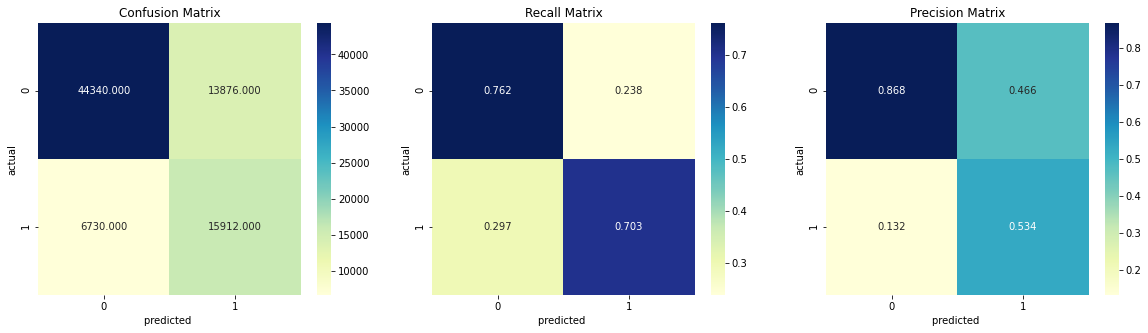

In [44]:
y_pred = sig_clf.predict(test_x_onehotencoding)
plot_confusion_matrix(y_pred,y_test)

## What can we do to improve performance?
- Data can be increased.
- Class balancing in model can be used.
- Features can be developed.
- Apart from BOW,TFIDF other form of vectorization can be done. like : Average TFIDf, WORD2VEC, Average WORD2VEC 

### LINEAR SVM 

For values of alpha =  1e-05 The log loss is: 0.5173488613073004
For values of alpha =  0.0001 The log loss is: 0.4977879454462298
For values of alpha =  0.001 The log loss is: 0.5007574890428629
For values of alpha =  0.01 The log loss is: 0.5467274912315229
For values of alpha =  0.1 The log loss is: 0.5732224161414154
For values of alpha =  1 The log loss is: 0.5831574076878009


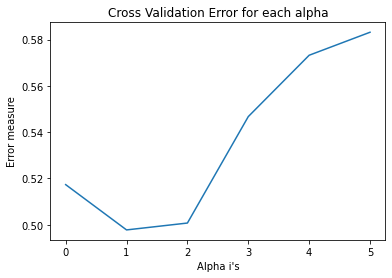

For values of best alpha =  0.0001 The train log loss is: 0.4909830997605735
For values of best alpha =  0.0001 The cross validation log loss is: 0.4977879454462298
For values of best alpha =  0.0001 The test log loss is: 0.49335357158669313


In [54]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotencoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding, y_train)
    predict_y = sig_clf.predict_proba(cv_x_onehotencoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


plt.title("Cross Validation Error for each alpha")
plt.plot(cv_log_error_array)
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding, y_train)

predict_y = sig_clf.predict_proba(train_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

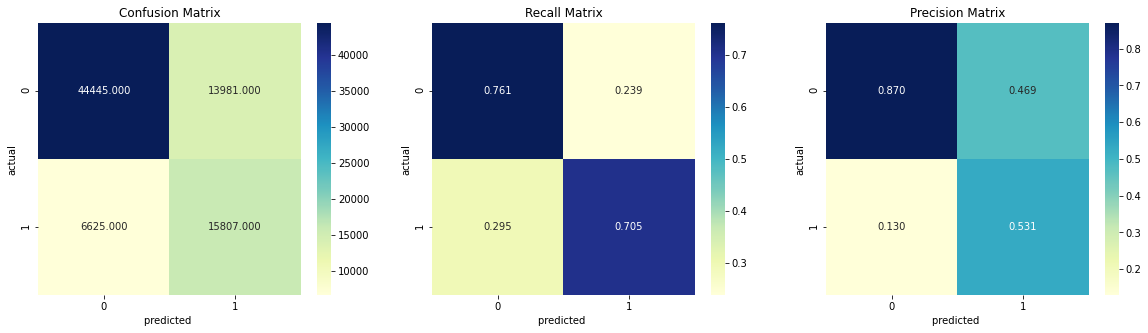

In [55]:
y_pred = sig_clf.predict(test_x_onehotencoding)
plot_confusion_matrix(y_pred,y_test)

since logistic regression and svm are high bias model. to check if it suffer from __under fitting__
only way is to train data in Complex model.
As, dimension is not much large __<1000__
so Tree based model can be a hope<br>

##### Some models that might works are: <br>
    - Random Forest
    - XGBoost

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
# hyper parameter for forest are 
# - Depth
# - no of models built

train_x_onehotencoding = train_x_onehotencoding[:10000]
test_x_onehotencoding = test_x_onehotencoding[:10000]
cv_x_onehotencoding = cv_x_onehotencoding[:10000]

y_train = y_train[:10000]
y_test = y_test[:10000]
y_cv = y_cv[:10000]

alpha = [100,200,500]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotencoding, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotencoding, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 



for n_estimators = 100 and max depth =  5
Log Loss : 0.4962303380194847
for n_estimators = 100 and max depth =  10
Log Loss : 0.47757968963752584
for n_estimators = 200 and max depth =  5
Log Loss : 0.4953417485535654
for n_estimators = 200 and max depth =  10
Log Loss : 0.47595228520133304
for n_estimators = 500 and max depth =  5
Log Loss : 0.4922688388663624
for n_estimators = 500 and max depth =  10
Log Loss : 0.4742902931351147


In [61]:
# testing in best alpha
clf = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
clf.fit(train_x_onehotencoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding, y_train)

predict_y = sig_clf.predict_proba(train_x_onehotencoding)
print('For values of best estimator = ',500, 
      "The train log loss is:",log_loss(y_train, predict_y, 
                labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotencoding)
print('For values of best estimator = ', 500, 
      "The cross validation log loss is:",log_loss(y_cv, predict_y, 
                labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotencoding)
print('For values of best estimator = ', 500, 
      "The test log loss is:",log_loss(y_test, predict_y, 
                labels=clf.classes_, eps=1e-15))

For values of best estimator =  500 The train log loss is: 0.4355554412332132
For values of best estimator =  500 The cross validation log loss is: 0.4742902931351147
For values of best estimator =  500 The test log loss is: 0.4749145116048616


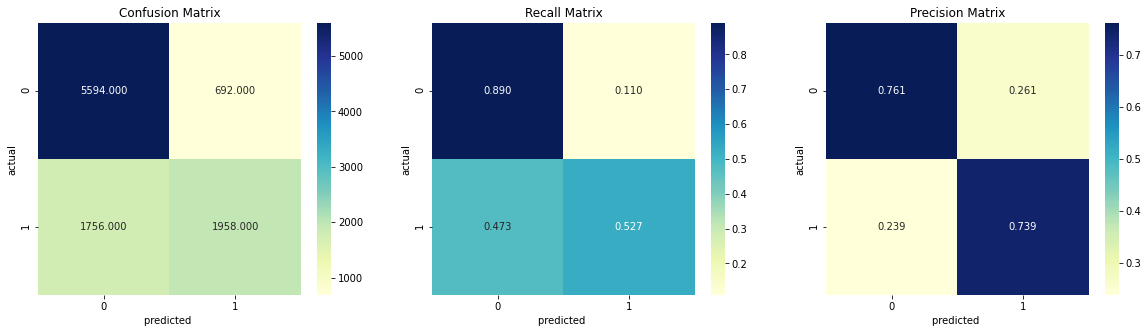

In [63]:
y_pred = sig_clf.predict(test_x_onehotencoding)
plot_confusion_matrix(y_test,y_pred)

__CONCLUSION__:<br>

- If we use more data,then loss might decrease while using Random Forest.
- If Model like __XGBOOST__,__ADABOOST__ is used loss might decrease significantly.
- Due to the hardware requirement, we are not able to perform in large data as it might take days.
    
    also,
- __Hyperparameter tuning__ is done on small set. If we are able to play with those loss can be decreases.
- As per now, there is possibility of logistic and SVM are underfitting : __HIGH BAIS__

__TIPS TO INCREASE PERFORMANCE__ <br>
- Increase Data.
- Use High Varience Model.: __XGBOOST__
- __Hyperparameter tuning__ in large set of values.
- Feature data with other technique.
    - some that might work are 
        - subsequence ratio.
        - n-grams.
        - Word2Vec.
        - Normalize the data